# Практика застосування kNN та Naive Bayes. EDA

### Знайомство з даними

In [35]:
import warnings
import pandas as pd
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:

# Завантаження навчального та валідаційного наборів даних
train_data = pd.read_csv('../datasets/mod_04_hw_train_data.csv')
valid_data = pd.read_csv('../datasets/mod_04_hw_valid_data.csv')

# Відображення перших кількох рядків навчального набору даних для огляду
train_data.head(), valid_data.head()



(                 Name  Phone_Number  Experience Qualification University  \
 0  Jennifer Hernandez  120-602-1220         3.0           Msc      Tier2   
 1      Timothy Walker  840-675-8650         5.0           PhD      Tier2   
 2         David Duran  556-293-8643         5.0           Msc      Tier2   
 3       Gloria Ortega  463-559-7474         3.0           Bsc      Tier3   
 4      Matthew Steele  968-091-7683         5.0           Bsc      Tier2   
 
      Role Cert Date_Of_Birth  Salary  
 0     Mid  Yes    25/08/1972   98000  
 1  Senior  Yes    03/12/2013  135500  
 2  Senior  Yes    19/07/2002  123500  
 3     Mid   No    19/02/1970   85000  
 4  Senior  Yes    20/02/1970  111500  ,
               Name  Phone_Number  Experience Qualification University    Role  \
 0   Alvaro Johnson  320-636-8883           7           Bsc      Tier1  Senior   
 1    Austin Powers  903-121-1691           2           Msc      Tier1     Mid   
 2      Joshua Phil  673-972-2453           3    

Статистичний огляд навчального набору даних

In [37]:
train_stats = train_data.describe(include='all')
train_stats,

(               Name  Phone_Number  Experience Qualification University  \
 count           249           249  247.000000           248        249   
 unique          248           249         NaN             3          3   
 top     Eric Taylor  120-602-1220         NaN           Bsc      Tier1   
 freq              2             1         NaN           113         94   
 mean            NaN           NaN    3.441296           NaN        NaN   
 std             NaN           NaN    1.496471           NaN        NaN   
 min             NaN           NaN    1.000000           NaN        NaN   
 25%             NaN           NaN    2.000000           NaN        NaN   
 50%             NaN           NaN    4.000000           NaN        NaN   
 75%             NaN           NaN    5.000000           NaN        NaN   
 max             NaN           NaN    5.000000           NaN        NaN   
 
           Role Cert Date_Of_Birth         Salary  
 count      246  247           249     249.000

Статистичний огляд валідаційного набору даних

In [38]:
valid_stats = valid_data.describe(include='all')

valid_stats


,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
count,7,7,7.0,7,7,7,7,7,7.000000
unique,7,7,NaN,3,3,3,2,7,NaN
top,Alvaro Johnson,320-636-8883,NaN,Bsc,Tier1,Junior,Yes,12/03/1978,NaN
freq,1,1,NaN,3,3,3,4,1,NaN
mean,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,93200.000000
std,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,17186.622705
min,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,69800.000000
25%,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,80300.000000
50%,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,97300.000000
75%,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,104100.000000


Перевірка  типів даних у тренувальному наборі

In [39]:
dtypes_train = train_data.dtypes
dtypes_train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           249 non-null    object 
 1   Phone_Number   249 non-null    object 
 2   Experience     247 non-null    float64
 3   Qualification  248 non-null    object 
 4   University     249 non-null    object 
 5   Role           246 non-null    object 
 6   Cert           247 non-null    object 
 7   Date_Of_Birth  249 non-null    object 
 8   Salary         249 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 17.6+ KB


Перевірка типів даних у валідаційному наборі

In [40]:
dtypes_valid = valid_data.dtypes
dtypes_valid 
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           7 non-null      object
 1   Phone_Number   7 non-null      object
 2   Experience     7 non-null      int64 
 3   Qualification  7 non-null      object
 4   University     7 non-null      object
 5   Role           7 non-null      object
 6   Cert           7 non-null      object
 7   Date_Of_Birth  7 non-null      object
 8   Salary         7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 636.0+ bytes


In [41]:
train_data.nunique()

Name             248
Phone_Number     249
Experience         5
Qualification      3
University         3
Role               3
Cert               2
Date_Of_Birth    247
Salary            84
dtype: int64

Адаптація ознак і цільової змінної

In [42]:
train_data['Name'].head()

0    Jennifer Hernandez
1        Timothy Walker
2           David Duran
3         Gloria Ortega
4        Matthew Steele
Name: Name, dtype: object

In [43]:
train_data.drop('Name', axis=1, inplace=True)

In [44]:
train_data['Salary'].value_counts().sort_index()

Salary
49500     3
53500     3
56500     4
57500     4
59500     3
         ..
130500    2
131500    6
134500    3
135500    5
141500    1
Name: count, Length: 84, dtype: int64

In [45]:
train_data['Salary'] = np.where(train_data['Salary'] == 4, 0, 1)
train_data['Salary'].value_counts()

Salary
1    249
Name: count, dtype: int64

In [46]:
train_data['Qualification'] = train_data['Qualification'].astype(bool).astype(int).astype(str)

Перевірка на відсутні значення в навчальному наборі

In [47]:
missing_values_train = train_data.isnull().sum()
missing_values_train, 

(Phone_Number     0
 Experience       2
 Qualification    0
 University       0
 Role             3
 Cert             2
 Date_Of_Birth    0
 Salary           0
 dtype: int64,)

Перевірка на відсутні значення в валідаційному наборі

In [48]:
missing_values_valid = valid_data.isnull().sum()
missing_values_valid

Name             0
Phone_Number     0
Experience       0
Qualification    0
University       0
Role             0
Cert             0
Date_Of_Birth    0
Salary           0
dtype: int64

Нормалізація числових даних (Experience, Salary).

In [49]:
# Імп'ютери для числових і категоріальних даних
imputer_num = SimpleImputer(strategy='median')  # Медіана для числових даних
imputer_cat = SimpleImputer(strategy='most_frequent')  # Найчастіше значення для категоріальних даних

# Обробка відсутніх значень для числових полів
train_data['Experience'] = imputer_num.fit_transform(train_data[['Experience']])

Кодування категоріальних даних (Qualification, University, Role, Cert).

In [50]:
# Обробка відсутніх значень для категоріальних полів
# SimpleImputer може повертати 2D масив, тому використовуємо ravel() для перетворення у 1D масив перед присвоєнням назад у DataFrame
train_data['Qualification'] = imputer_cat.fit_transform(train_data[['Qualification']]).ravel()  # Використання ravel() для перетворення у 1D
train_data['Role'] = imputer_cat.fit_transform(train_data[['Role']]).ravel()  # Використання ravel() для перетворення у 1D
train_data['Cert'] = imputer_cat.fit_transform(train_data[['Cert']]).ravel()  # Використання ravel() для перетворення у 1D


Перевірка відсутніх значень після обробки

In [51]:
missing_values_updated = train_data.isnull().sum()
missing_values_updated

Phone_Number     0
Experience       0
Qualification    0
University       0
Role             0
Cert             0
Date_Of_Birth    0
Salary           0
dtype: int64

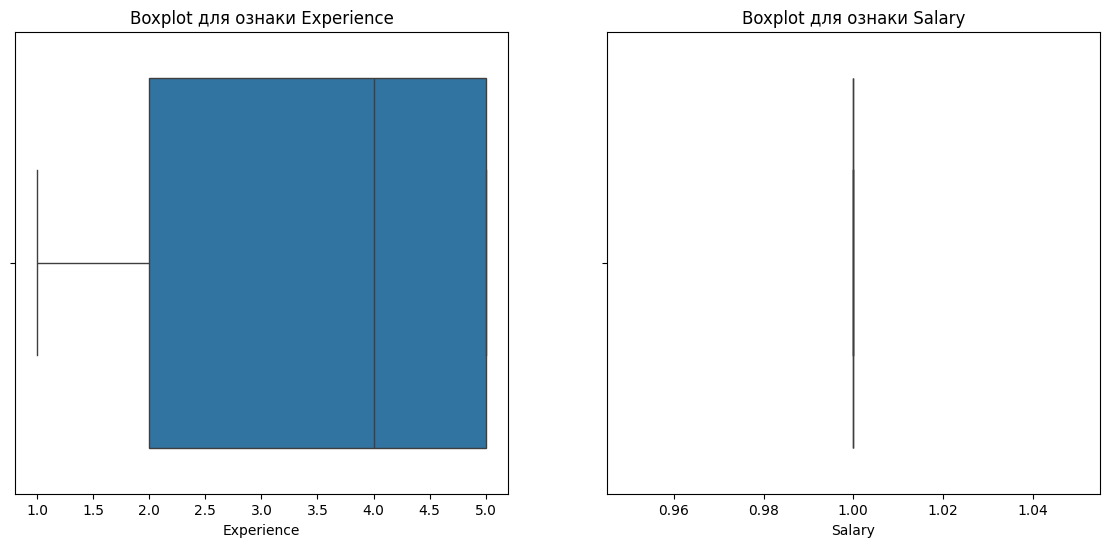

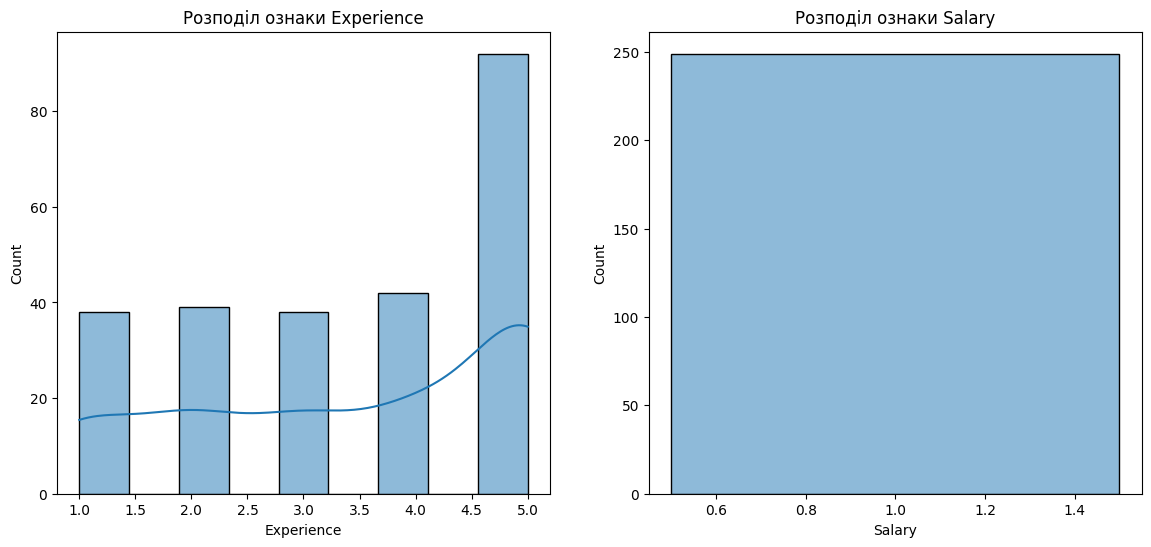

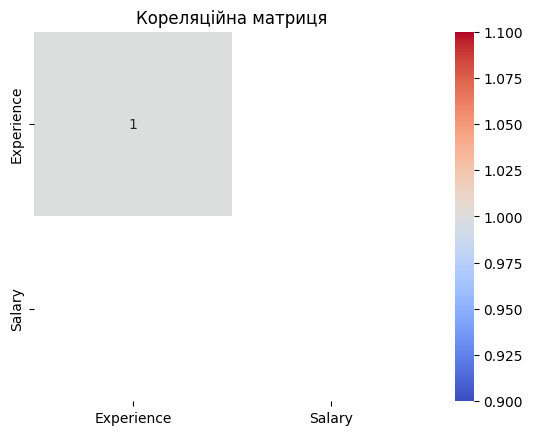

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Аналіз викидів за допомогою boxplot
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.boxplot(x=train_data['Experience'], ax=axs[0])
axs[0].set_title('Boxplot для ознаки Experience')

sns.boxplot(x=train_data['Salary'], ax=axs[1])
axs[1].set_title('Boxplot для ознаки Salary')

plt.show()

# Аналіз розподілу ознак
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.histplot(train_data['Experience'], kde=True, ax=axs[0])
axs[0].set_title('Розподіл ознаки Experience')

sns.histplot(train_data['Salary'], kde=True, ax=axs[1])
axs[1].set_title('Розподіл ознаки Salary')

plt.show()

# Кореляційний аналіз числових ознак
correlation_matrix = train_data[['Experience', 'Salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()



Побудова моделі kNN-регресора

### Розподіл ознак

In [53]:
train_data.describe()

,Experience,Salary
count,249.000000,249.0
mean,3.445783,1.0
std,1.491262,0.0
min,1.000000,1.0
25%,2.000000,1.0
50%,4.000000,1.0
75%,5.000000,1.0
max,5.000000,1.0


In [54]:
train_data.skew(numeric_only=True)

Experience   -0.397904
Salary        0.000000
dtype: float64

### Вимоги алгоритмів до обробки даних
### Очистка від викидів

In [55]:
from scipy import stats

# Виділення числових даних для аналізу
numerical_data = train_data.select_dtypes(include=[np.number])

# Обрахунок Z-оцінки для числових колонок
z_scores = np.abs(stats.zscore(numerical_data))

# Видалення рядків, де будь-яка числова колонка має Z-оцінку більше 3
filtered_data = numerical_data[(z_scores < 3).all(axis=1)]

# Відображення кількості видалених рядків з викидами
print("Видалено рядків з викидами:", numerical_data.shape[0] - filtered_data.shape[0])

# Створення копії датафрейму для безпечної модифікації
filtered_data = filtered_data.copy()

# Заповнення пропущених значень медіаною для кожної колонки
filtered_data = filtered_data.fillna(filtered_data.median())

# Перевірка пропущених значень після обробки
print(filtered_data.isnull().sum())

Видалено рядків з викидами: 249
Experience    0
Salary        0
dtype: int64


### Видалення ознак, тісно пов`язаних з іншими ознаками

In [56]:

# Виділення категоріальних і числових ознак
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Salary')  # Видалення цільової змінної

# Створення пайплайнів для обробки ознак
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Заповнення пропусків медіаною
    ('scaler', StandardScaler())                    # Нормалізація даних
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заповнення пропусків
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # One-hot кодування
])

# Об'єднання трансформерів у колонковий трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### Огляд категоріальних ознак

### Розбиття на тренувальну і тестову вибірки

In [57]:
# Створення пайплайну з моделлю
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Використання 5 найближчих сусідів
])

# Розділення даних на ознаки і цільову змінну
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']

# Навчання моделі
model_pipeline.fit(X_train, y_train)


NameError: name 'KNeighborsRegressor' is not defined

### Кодування категоріальних змінних

In [ ]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
encoder = ce.WOEEncoder(cols=cat_cols)

X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

### Нормалізація змінних. Зменшення асиметрії

In [ ]:
power_transform = PowerTransformer().set_output(transform='pandas')

X_train = power_transform.fit_transform(X_train)
X_test = power_transform.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
X_train.skew()

age            0.007984
job            0.048212
marital        0.826785
education      0.056809
default        2.514470
housing       -0.106005
loan          -1.703180
contact       -0.586952
month          0.104885
day_of_week   -0.179013
campaign       0.237176
pdays         -4.813348
previous       2.069751
poutcome       2.070238
euribor3m     -0.615990
dtype: float64

### Балансування класів

In [ ]:
y_train.value_counts(normalize=True)

y
0    0.884514
1    0.115486
Name: proportion, dtype: float64

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=50)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Практика застосування kNN та Naive Bayes. Побудова й оцінка моделей

### kNN-класифікатор

In [ ]:
knn_mod = KNeighborsClassifier(n_neighbors=15, n_jobs=-1).fit(X_res, y_res)

knn_preds = knn_mod.predict(X_test)

knn_score = balanced_accuracy_score(y_test, knn_preds)

print(f'KNN model accuracy: {knn_score:.1%}')

KNN model accuracy: 70.7%


### Naive Bayes класифікатор

In [ ]:
gnb_mod = GaussianNB().fit(X_res, y_res)

gnb_preds = gnb_mod.predict(X_test)

gnb_score = balanced_accuracy_score(y_test, gnb_preds)

print(f'GNB model accuracy: {gnb_score:.1%}')

GNB model accuracy: 71.2%


In [ ]:
confusion_matrix(y_test, gnb_preds)

array([[5953, 1104],
       [ 381,  525]], dtype=int64)